In [41]:
import numpy as np
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score, train_test_split

In [18]:
titanic_df = fetch_openml("titanic", as_frame=True).frame

/usr/local/lib/python3.9/site-packages/sklearn/datasets/_openml.py:404: UserWarning: Multiple active versions of the dataset matching the name titanic exist. Versions may be fundamentally different, returning version 2.
  warn("Multiple active versions of the dataset matching the name"


In [33]:
y = titanic_df['class']
X = titanic_df[['Class', 'Age', 'Sex']]
feature_names = ['Class', 'Age', 'Sex']

In [36]:
titanic_tree = DecisionTreeClassifier()
titanic_tree.fit(X,y)

DecisionTreeClassifier()

In [37]:
print(tree.export_graphviz(titanic_tree, feature_names=feature_names))

digraph Tree {
node [shape=box] ;
0 [label="Sex <= -0.699\ngini = 0.437\nsamples = 2201\nvalue = [1490, 711]"] ;
1 [label="Class <= -0.451\ngini = 0.392\nsamples = 470\nvalue = [126, 344]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Class <= -1.396\ngini = 0.126\nsamples = 251\nvalue = [17, 234]"] ;
1 -> 2 ;
3 [label="Age <= 2.076\ngini = 0.054\nsamples = 145\nvalue = [4, 141]"] ;
2 -> 3 ;
4 [label="gini = 0.054\nsamples = 144\nvalue = [4, 140]"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
3 -> 5 ;
6 [label="Age <= 2.076\ngini = 0.215\nsamples = 106\nvalue = [13, 93]"] ;
2 -> 6 ;
7 [label="gini = 0.24\nsamples = 93\nvalue = [13, 80]"] ;
6 -> 7 ;
8 [label="gini = 0.0\nsamples = 13\nvalue = [0, 13]"] ;
6 -> 8 ;
9 [label="Class <= 0.493\ngini = 0.5\nsamples = 219\nvalue = [109, 110]"] ;
1 -> 9 ;
10 [label="Age <= 2.076\ngini = 0.497\nsamples = 196\nvalue = [106, 90]"] ;
9 -> 10 ;
11 [label="gini = 0.497\nsamples = 165\nvalue = [89, 76]"]

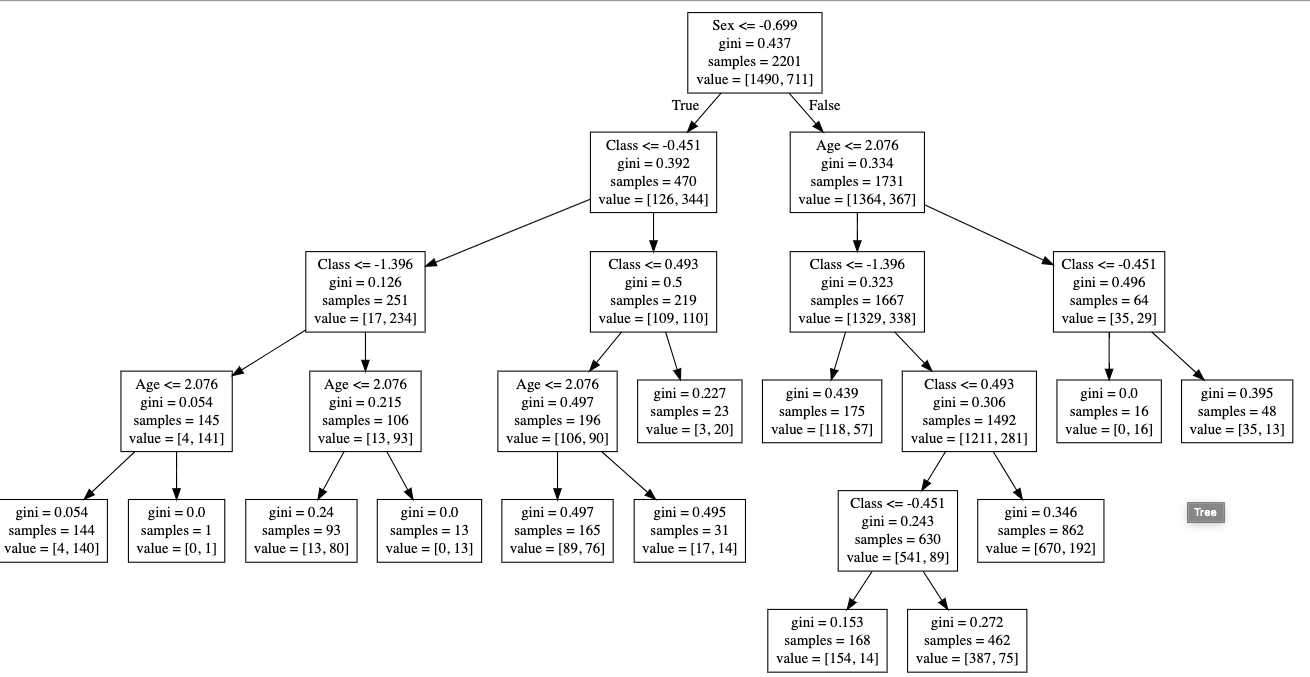

In [38]:
cvs = cross_val_score(titanic_tree, X, y, cv=10)
print(cvs)

[0.80542986 0.78636364 0.8        0.78636364 0.79545455 0.79090909
 0.79090909 0.81363636 0.77727273 0.75909091]


In [39]:
titanic_tree = DecisionTreeClassifier(max_depth= 4, min_samples_leaf=5, max_leaf_nodes=5)
titanic_tree.fit(X,y)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5, min_samples_leaf=5)

In [40]:
print(tree.export_graphviz(titanic_tree, feature_names=feature_names))

digraph Tree {
node [shape=box] ;
0 [label="Sex <= -0.699\ngini = 0.437\nsamples = 2201\nvalue = [1490, 711]"] ;
1 [label="Class <= -0.451\ngini = 0.392\nsamples = 470\nvalue = [126, 344]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
3 [label="gini = 0.126\nsamples = 251\nvalue = [17, 234]"] ;
1 -> 3 ;
4 [label="gini = 0.5\nsamples = 219\nvalue = [109, 110]"] ;
1 -> 4 ;
2 [label="Age <= 2.076\ngini = 0.334\nsamples = 1731\nvalue = [1364, 367]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="gini = 0.323\nsamples = 1667\nvalue = [1329, 338]"] ;
2 -> 5 ;
6 [label="Class <= -0.451\ngini = 0.496\nsamples = 64\nvalue = [35, 29]"] ;
2 -> 6 ;
7 [label="gini = 0.0\nsamples = 16\nvalue = [0, 16]"] ;
6 -> 7 ;
8 [label="gini = 0.395\nsamples = 48\nvalue = [35, 13]"] ;
6 -> 8 ;
}


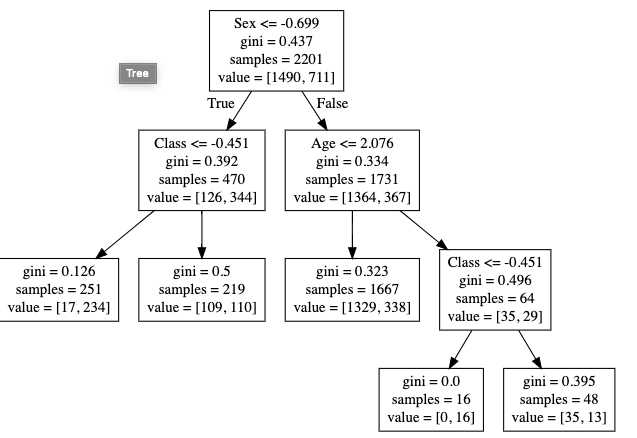

In [44]:
digits = sklearn.datasets.load_digits()

X = digits.data
y = digits.target

X_train, Y_train, X_test, Y_test = train_test_split(X, y, test_size=.2)

In [46]:
digit_tree = DecisionTreeClassifier().fit(X_train, X_test)

In [47]:
print(tree.export_graphviz(digit_tree))

digraph Tree {
node [shape=box] ;
0 [label="X[36] <= 0.5\ngini = 0.9\nsamples = 1437\nvalue = [147, 147, 130, 146, 148, 141, 146, 143, 140, 149]"] ;
1 [label="X[28] <= 2.5\ngini = 0.542\nsamples = 226\nvalue = [143, 0, 2, 0, 4, 20, 4, 0, 3, 50]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[21] <= 0.5\ngini = 0.168\nsamples = 157\nvalue = [143, 0, 1, 0, 4, 6, 3, 0, 0, 0]"] ;
1 -> 2 ;
3 [label="X[6] <= 1.0\ngini = 0.675\nsamples = 13\nvalue = [1, 0, 0, 0, 3, 6, 3, 0, 0, 0]"] ;
2 -> 3 ;
4 [label="X[61] <= 12.0\ngini = 0.612\nsamples = 7\nvalue = [1, 0, 0, 0, 3, 0, 3, 0, 0, 0]"] ;
3 -> 4 ;
5 [label="X[13] <= 6.0\ngini = 0.375\nsamples = 4\nvalue = [1, 0, 0, 0, 3, 0, 0, 0, 0, 0]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 3, 0, 0, 0, 0, 0]"] ;
5 -> 6 ;
7 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"] ;
5 -> 7 ;
8 [label="gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 0, 0, 3, 0, 0, 0]"] ;
4 -> 8 ;
9 [label="g

In [48]:
#GRaph is way to big to put in here